# Chapter 4 - Entrenando Modelos

MSE(θ) -> MSE(x,h_θ)


Palabras para este capítulo:
tweaks - ajustes
several - varias/varios
still - aún
switching  - transpuesta
setting - configuración
performs - realiza
straightforward - sencillo
pitfalls - trampas
restart - reanudar

# Setup

This project requires Python 3.7 or above:

In [43]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [44]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [45]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [47]:
# Creamos un folder para guardar las imágenes generadas (si es que no existe ya), y definimos la función save_fig() 
# que se utilizará para guardar las imágenes
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Regresión Lineal

Estudiaremos la regresión lineal. Uno de los algoritmos más simples. Se abordará de dos métodos de entrenamientos muy distintos:
- Utilizando una ecuación cerrada (closet-form equation) la cual calcula los parámetros del modelo que más se ajustan a los datos de entrenamiento (es decir, los parámetros del modelo que minimizan la función de costo sobre el conjunto de entrenamiento)
- Usando el Descenso del Gradiente (Gradient Descent "GD") el cual ajusta gradualmente los parámetros del modelo para minimizar la función de costo sobre el conjunto de entrenamiento. Eventualmente este método converge al mismo conjunto de parámetros que el primer método.

Después revisaremos la Regresión Polinómica, un modelo más complejo que puede abordar datos no lineales. Ya que este modelo tiene más parámetros que el modelo de Regresión Lineal, es más propenso a sobre ajustarse a los datos de entrenamiento. Por lo que estaremos aprendiendo a detectar si este es el caso o no, usando curvas de aprendizaje (learning curves), y después veremos varias técnicas de regularización que pueden reducir el riezgo de sobre ajuste en los datos de entrenamiento.

De manera general, un modelo lineal hace una predicción calculando la suma ponderada de las características de entreda, mas una constante llamada término de sesgo (o término de intersección)

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- $\hat{y}$ es el valor predicho.

- $n$ es el número de características.

- $x_i$ es el valor de la característica $i^{th}$.

- $\theta_j$ es el parémetro del modelo  $j^{th}$ (incluido el término de sesgo $\theta_0$ y la característica de pesos $\theta_1 + \theta_2 + ,..., + \theta_n$)

Esto puede escribirse de una forma más concisa usando la notación vectorial:



$$
\hat{y} = h_{\theta}(x) = \mathbf{\theta} \cdot \mathbf{x}
$$
(no se aprecia bien, pero $\theta$ está en negrita porque es un vector, igual que $\mathbf{x}$)

En esta ecuación:
- $\mathbf{\theta}$ es el vector de parámetros del modelo, que contiene el término de sesgo $\theta_0$ y los pesos de las características $\theta_1$ a $\theta_n$.
- $\mathbf{x}$ es el vector de características de la instancia, que contiene $x_0$ a $x_n$, con $x_0$ siempre igual a 1.
- $\mathbf{\theta} \cdot \mathbf{x}$ es el producto punto de los vectores $\theta$ y $\mathbf{x}$, que por supuesto es igual a $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$.
- $h_{\mathbf{\theta}}$ es la función de hipótesis, usando los parámetros del modelo $\theta$.

En machine learning, una función de hipótesis es una función matemática que representa el modelo que estás utilizando para hacer predicciones, es fundamental porque dedine cómo el modelo transforma las entradas en predicciones. En otras palabras, la función de hipótesis $ h_{\theta}(x)$ utiliza los parámetros $\theta$ y los valores de las características $\mathbf{x}$ para calcular la predicción de la salida.

OK, ese es el modelo de Regresión Lineal, pero ¿cómo lo entrenamos? Bueno, recordemos que entrenar un modelo significa ajustar sus parámetros para que el modelo se ajuste mejor al conjunto de entrenamiento. Para este propósito, primero necesitamos una medida de qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. En el Capítulo 2 vimos que la medida de rendimiento más común de un modelo de regresión es el Error Cuadrático Medio de la raíz $^{\textbf{[1]}}$ (Root Mean Square Error: RMSE). Por lo tanto, para entrenar un modelo de Regresión Lineal, necesitamos encontrar el valor de $\theta$ que minimice el RMSE. En la práctica, es más sencillo minimizar el error cuadrático medio (MSE) que el RMSE, y conduce al mismo resultado (porque el valor que minimiza una función también minimiza su raíz cuadrada).

El MSE de una hipótesis de Regresión Lineal $ h_\theta(x) $ en un conjunto de entrenamiento $\mathbf{X}$ se calcula usando la siguiente ecuación.

$$
\text{MSE}(X, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\theta^\top x^{(i)} - y^{(i)})^2
$$


### La Ecuación Normal
Para encontrar el valor de $ \theta $ que minimiza la función de costo, existe una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente. Esto se llama la Ecuación Normal:

$$
\hat{\theta} = (X^\top X)^{-1} X^\top y
$$

En esta ecuación:
- $ \hat{\theta} $ es el valor de $ \theta $ que minimiza la función de costo.
- $ y $ es el vector de valores objetivo que contiene $ y_1 $ a $ y_n $.

Generemos algunos datos con apariencia lineal para probar esta ecuación:

In [48]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

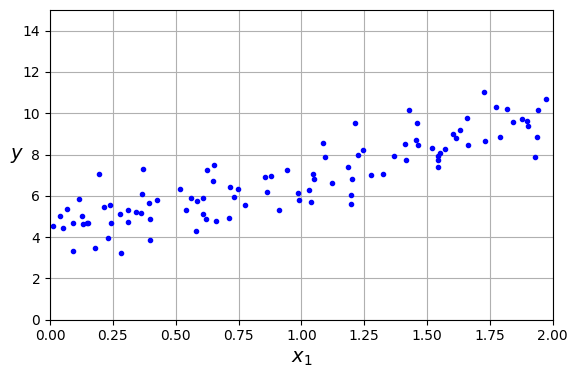

In [49]:
# generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

Ahora vamos a computar $\hat{\mathbf{\theta}}$ usando la Ecuación Normal. Vamos a utilizar la función inv() del módulo de álgebra lineal de Numpy (np.linalg) para copmutar la inversa de una matriz, y el método dot() para la multiplicación matricial: 

In [50]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # The @ operator performs matrix multiplication
                                                    # If A and B are NumPy arrays, then A @ B is equivalent to np.matmul(A, B)

La ecuación que usamos para generar la data es $y= 4+3x_1 +$ $ruido$ $gausiano$. Veamos qué encontró la ecuación:

In [51]:
theta_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado $\theta_0 = 4$ y $\theta_1 = 3$ en lugar de $\theta_0 = 4,215$ y $\theta_1=
2.770$. Lo suficientemente cerca, pero el ruido hizo imposible recuperar los parámetos exactos de la función original. Cuanto más pequeño y ruidoso sea el conjunto de datos, más difícil se vuelve.

Ahora podemos hacer predicciones usando $\hat{\mathbf{\theta}}$:

In [52]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Vamos a graficar las predicciones del modelo

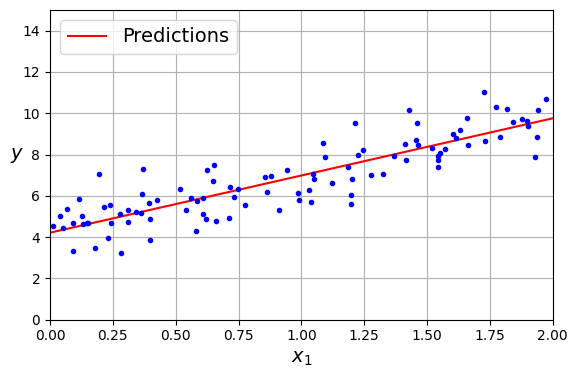

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

Realizar una regresión lineal utilizando Scikit-Learn es relativamente sencillo:

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [55]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Observe que Scikit-Learn separa el término de sesgo (intercept_) de la característica
pesos (coef_). La clase LinearRegression se basa en la función scipy.linalg.lstsq() (el nombre significa “mínimos cuadrados”), a la que puedes llamar directamente:

In [56]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula **$\mathbf{\hat{\theta} = X^+ y}$**, donde **$\mathbf{X^+}$** es la pseudoinversa de **$\mathbf{X}$** (específicamente, la inversa de Moore-Penrose). Puedes usar `np.linalg.pinv()` para calcular la pseudoinversa directamente:

In [57]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

La pseudoinversa se calcula utilizando una técnica estándar de factorización de matrices llamada *Descomposición en Valores Singulares* (SVD) que puede descomponer la matriz del conjunto de entrenamiento $\mathbf{X}$ en la multiplicación de tres matrices $\mathbf{U \Sigma V^\top}$ (ver `numpy.linalg.svd()`). La pseudoinversa se calcula como $\mathbf{X^+ = V \Sigma^+ U^\top}$. Para calcular la matriz $\mathbf{\Sigma^+}$, el algoritmo toma $\mathbf{\Sigma}$ y establece en cero todos los valores menores que un pequeño valor umbral, luego reemplaza todos los valores no nulos con sus inversos, y finalmente transpone la matriz resultante. Este enfoque es más eficiente que calcular la Ecuación Normal, además maneja bien los casos extremos: de hecho, la Ecuación Normal puede no funcionar si la matriz $\mathbf{X^\top X}$ no es invertible (es decir, singular), como si $m < n$ o si algunas características son redundantes, pero la pseudoinversa siempre está definida.

### Complejidad Computacional

La Ecuación Normal calcula la inversa de $\mathbf{X}^{\top}\mathbf{X}$, que es una matriz de $(n + 1) \times (n + 1)$ (donde $n$ es el número de características). La complejidad computacional de invertir dicha matriz es típicamente de alrededor de $O(n^{2.4})$ a $O(n^{3})$, dependiendo de la implementación. En otras palabras, si duplicas el número de características, multiplicas el tiempo de cálculo aproximadamente por $2^{2.4} = 5.3$ a $2^{3} = 8$. 

El enfoque de SVD utilizado por la clase `LinearRegression` de Scikit-Learn es de aproximadamente $O(n^{2})$. Si duplicas el número de características, multiplicas el tiempo de cálculo aproximadamente por $4$.

> **Advertencia**
> Tanto la Ecuación Normal como el enfoque SVD se vuelven muy lentos cuando el número de características crece mucho (por ejemplo, 100,000). En el lado positivo, ambos son lineales con respecto al número de instancias en el conjunto de entrenamiento (son $O(m)$), por lo que manejan eficientemente conjuntos de entrenamiento grandes, siempre y cuando puedan caber en memoria.

 Además, una vez que has entrenado tu modelo de Regresión Lineal (usando la Ecuación Normal o cualquier otro algoritmo), las predicciones son muy rápidas: la complejidad computacional es lineal con respecto tanto al número de instancias sobre las que quieres hacer predicciones como al número de características. En otras palabras, hacer predicciones sobre el doble de instancias (o el doble de características) tomará aproximadamente el doble de tiempo.

 Ahora veremos una manera muy diferente de entrenar un modelo de Regresión Lineal, que es más adecuada para casos donde hay un gran número de características o demasiadas instancias de entrenamiento para caber en memoria.

## Descenso de Gradiente

El Descenso de Gradiente es un algoritmo de optimización genérico capaz de encontrar soluciones óptimas para una amplia gama de problemas. La idea general del Descenso de Gradiente es ajustar los parámetros iterativamente para minimizar una función de costo.

Supongamos que estás perdido en las montañas en una densa niebla, y solo puedes sentir la pendiente del suelo bajo tus pies. Una buena estrategia para llegar al fondo del valle rápidamente es ir cuesta abajo en la dirección de la pendiente más pronunciada. Esto es exactamente lo que hace el Descenso de Gradiente: mide el gradiente local de la función de error con respecto al vector de parámetros $\mathbf{\theta}$, y va en la dirección del gradiente descendente. ¡Una vez que el gradiente es cero, has alcanzado un mínimo!

Concretamente, comienzas llenando $\mathbf{\theta}$ con valores aleatorios (esto se llama inicialización aleatoria). Luego lo mejoras gradualmente, dando un paso a la vez, cada paso intentando disminuir la función de costo (por ejemplo, el MSE), hasta que el algoritmo converge a un mínimo.


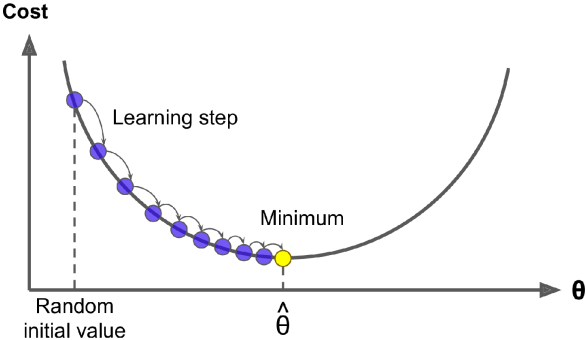

*En esta representación de Gradient Descent, los parámetros del modelo se inicializan aleatoriamente y se modifican repetidamente para minimizar la función de costos; El tamaño del paso de aprendizaje es proporcional a la pendiente de la función de costo, por lo que los pasos se hacen gradualmente más pequeños a medida que los parámetros se acercan al mínimo.*


Un parámetro importante en Gradient Descent es el tamaño de los pasos, determinado por el hiperparámetro de la tasa de aprendizaje. Si la tasa de aprendizaje es demasiado pequeña, el algoritmo tendrá que pasar por muchas iteraciones para converger, lo que tomará mucho tiempo

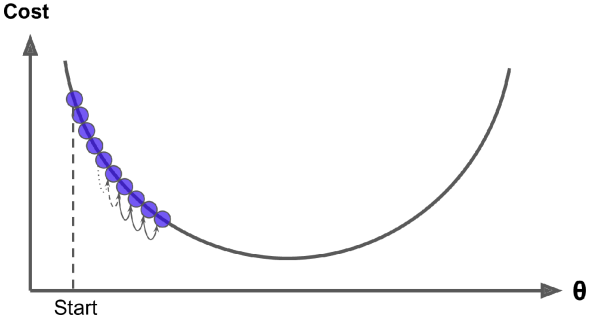

*figura 4-54. El radio de aprendizaje es muy pequeño*

Por otro lado, si la tasa de aprendizaje es demasiado alta, podrías saltar sobre el valle y terminar en el otro lado, posiblemente incluso más alto que antes. Esto podría hacer que el algoritmo diverja, con valores cada vez mayores, fallando en encontrar una buena solución (ver Figura 4-5).

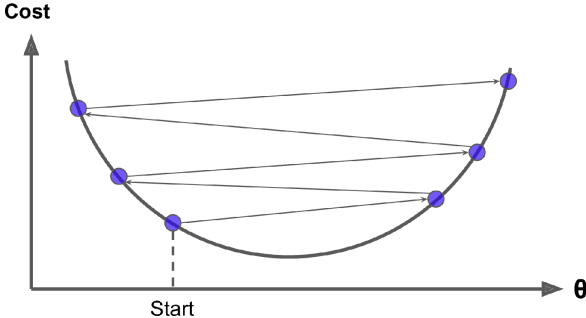

Además, no todas las funciones de costo se parecen a cuencos regulares y bonitos. Puede haber agujeros, crestas, mesetas y todo tipo de terreno irregular, lo que hace difícil la convergencia al mínimo. La figura siguiente muestra los dos principales desafíos con gradient descent. Si la inicialización aleatoria comienza el algoritmo a la izquierda, entonces convergerá a un mínimo local, que no es tan bueno como el mínimo global. Si comienza a la derecha, tomará mucho tiempo cruzar la meseta. Y si te detienes demasiado pronto, nunca llegarás al mínimo global.

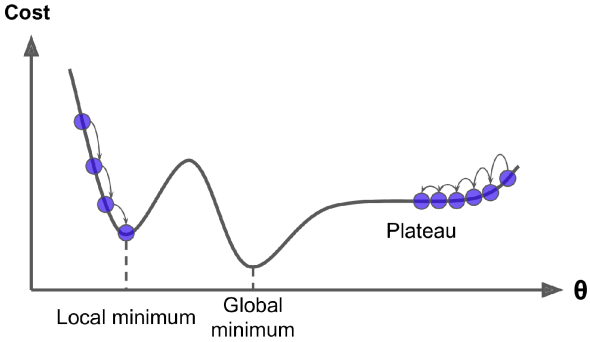

*trampas del descenso de gradiente*

Afortunadamente, la función de costo MSE para un modelo de regresión lineal resulta ser una función convexa, lo que significa que si eliges dos puntos cualesquiera en la curva, el segmento de línea que los une nunca está por debajo de la curva. Esto implica que no hay mínimos locales, solo un mínimo global. También es una función continua con una pendiente que nunca cambia abruptamente. Estos dos hechos tienen una gran consecuencia: el gradient descent está garantizado para acercarse arbitrariamente al mínimo global (si esperas lo suficiente y si la tasa de aprendizaje no es demasiado alta).

Mientras la función de costo tiene la forma de un cuenco, puede ser un cuenco alargado si las características tienen escalas muy diferentes. La Figura 4-7 muestra gradient descent en un conjunto de entrenamiento donde las características 1 y 2 tienen la misma escala (a la izquierda), y en un conjunto de entrenamiento donde la característica 1 tiene valores mucho más pequeños que la característica 2 (a la derecha).

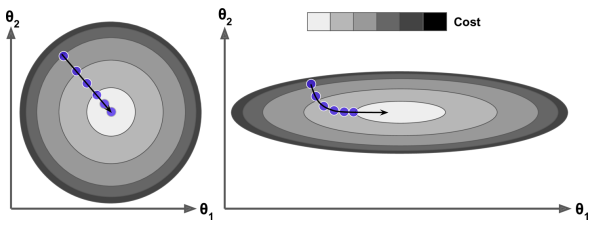

*Figura 4-7. Descenso de Gradiente con (izquierda) y sin (derecha) escalado de características
*
Como puedes ver, a la izquierda el algoritmo de gradient descent va directamente hacia el mínimo, alcanzándolo rápidamente, mientras que a la derecha primero va en una dirección casi ortogonal a la dirección del mínimo global, y termina con una larga marcha por un valle casi plano. Eventualmente llegará al mínimo, pero tomará mucho tiempo.

Al utilizar Gradient Descent, debe asegurarse de que todas las funciones tengan una escala similar (p. ej., usando la clase StandardScaler de Scikit-Learn), o tomará mucho más tiempo para converger.

Este diagrama también ilustra el hecho de que entrenar un modelo significa buscar una combinación de parámetros del modelo que minimice una función de costo (sobre el conjunto de entrenamiento). Es una búsqueda en el espacio de parámetros del modelo. Cuantos más parámetros tenga un modelo, más dimensiones tiene este espacio, y más difícil es la búsqueda: buscar una aguja en un pajar de 300 dimensiones es mucho más complicado que en 3 dimensiones. Afortunadamente, dado que la función de costo es convexa en el caso de la regresión lineal, la aguja está simplemente en el fondo del cuenco.



### Descenso de Gradiente por Lotes

Para implementar el Descenso de Gradiente, necesitas calcular el gradiente de la función de costo con respecto a cada parámetro del modelo $\mathbf{\theta_j}$. En otras palabras, necesitas calcular cuánto cambiará la función de costo si cambias $\mathbf{\theta_j}$ solo un poquito. Esto se llama derivada parcial. Es como preguntar “¿Cuál es la pendiente de la montaña bajo mis pies si miro hacia el este?” y luego hacer la misma pregunta mirando hacia el norte (y así sucesivamente para todas las demás dimensiones, si puedes imaginar un universo con más de tres dimensiones). La Ecuación 4-5 calcula la derivada parcial de la función de costo con respecto al parámetro $\mathbf{\theta_j}$, denotado $\frac{\partial}{\partial \mathbf{\theta_j}} MSE(\mathbf{\theta})$.

*Ecuación 4-5. Derivadas parciales de la función de costo*
$$
\frac{\partial}{\partial \theta_j} MSE(\mathbf{\theta}) = \frac{2}{m} \sum_{i=1}^m (\mathbf{\theta}^\top \mathbf{x^{(i)}} - y^{(i)}) x_j^{(i)}
$$

En lugar de calcular estas derivadas parciales individualmente, puedes usar la Ecuación 4-6 para calcularlas todas de una vez. El vector gradiente, denotado $\nabla MSE(\mathbf{\theta})$, contiene todas las derivadas parciales de la función de costo (una para cada parámetro del modelo).

*Ecuación 4-6. Vector gradiente de la función de costo*
$$
\nabla_\mathbf{\theta} MSE(\mathbf{\theta}) = 

\begin{pmatrix}
\frac{\partial}{\partial \theta_0} MSE(\mathbf{\theta}) \\
\frac{\partial}{\partial \theta_1} MSE(\mathbf{\theta}) \\
. \\
. \\
. \\

\frac{\partial}{\partial \theta_n} MSE(\mathbf{\theta})
\end{pmatrix} 

=\frac{2}{m} \mathbf{X}^\top (\mathbf{X\theta} - \mathbf{y})
$$

*ADVERTENCIA:* Observa que esta fórmula involucra cálculos sobre todo el conjunto de entrenamiento $\mathbf{X}$ en cada paso del Descenso de Gradiente. ¡Por eso el algoritmo se llama Descenso de Gradiente por Lotes: utiliza todo el lote de datos de entrenamiento en cada paso (de hecho, Descenso de Gradiente Completo sería un nombre mejor). Como resultado, es terriblemente lento en conjuntos de entrenamiento muy grandes (pero veremos algoritmos de Descenso de Gradiente mucho más rápidos en breve). Sin embargo, el Descenso de Gradiente escala bien con el número de características; entrenar un modelo de Regresión Lineal cuando hay cientos de miles de características es mucho más rápido usando Descenso de Gradiente que usando la Ecuación Normal o descomposición SVD.

Una vez que tengas el vector gradiente, que apunta cuesta arriba, simplemente ve en la dirección opuesta para ir cuesta abajo. Esto significa restar $\nabla_\mathbf{\theta}  MSE(\mathbf{\theta})$ de $\mathbf{\theta}$. Aquí es donde entra en juego la tasa de aprendizaje $\eta$: multiplica el vector gradiente por $\eta$ para determinar el tamaño del paso cuesta abajo (Ecuación 4-7).

*Ecuación 4-7. Paso del Descenso de Gradiente*
$$
\mathbf{\theta}^{\text{(next step)}} = \mathbf{\theta} - \eta \nabla_\mathbf{\theta} MSE(\mathbf{\theta})
$$

Veamos una implementación rápida de este algoritmo:

In [58]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

OK, ¡eso no fue tan difícil! Veamos el theta resultante:

In [59]:
theta

array([[4.21509616],
       [2.77011339]])

¡Oye, eso es exactamente lo que encontró la Ecuación Normal! El Descenso de Gradiente funcionó perfectamente. Pero ¿qué pasaría si hubieras usado una tasa de aprendizaje eta diferente? La Figura 4-8 muestra los primeros 10 pasos del Descenso de Gradiente utilizando tres tasas de aprendizaje diferentes (la línea discontinua representa el punto de partida).

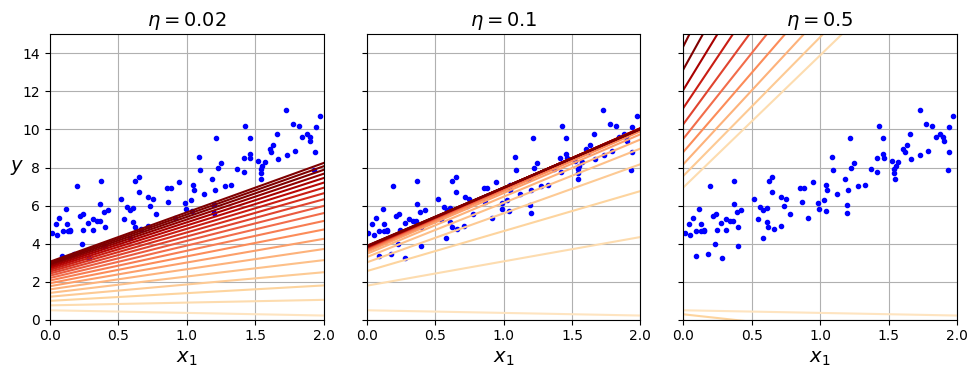

In [60]:
# generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()


En la izquierda, la tasa de aprendizaje es demasiado baja: el algoritmo eventualmente alcanzará la solución, pero tomará mucho tiempo. En el medio, la tasa de aprendizaje parece bastante buena: en solo unas pocas iteraciones, ya ha convergido a la solución. En la derecha, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, saltando de un lado a otro y alejándose cada vez más de la solución en cada paso.

Para encontrar una buena tasa de aprendizaje, puedes usar búsqueda en cuadrícula (ver Capítulo 2). Sin embargo, es posible que desees limitar el número de iteraciones para que la búsqueda en cuadrícula pueda eliminar los modelos que tardan demasiado en converger.

Puede que te preguntes cómo configurar el número de iteraciones. Si es demasiado bajo, seguirás estando lejos de la solución óptima cuando el algoritmo se detenga; pero si es demasiado alto, perderás tiempo mientras los parámetros del modelo ya no cambian más. Una solución simple es establecer un número muy grande de iteraciones pero interrumpir el algoritmo cuando el vector de gradiente se vuelva pequeño, es decir, cuando su norma sea menor que un número pequeño ε (llamado tolerancia), porque esto sucede cuando el Descenso de Gradiente ha alcanzado (casi) el mínimo.

**TASA DE CONVERGENCIA**

Cuando la función de costo es convexa y su pendiente no cambia abruptamente (como es el caso de la función de costo MSE), el Descenso de Gradiente por Lotes con una tasa de aprendizaje fija eventualmente convergerá a la solución óptima, pero puede que tengas que esperar un tiempo: puede tomar O(1/ε) iteraciones alcanzar el óptimo dentro de un rango de ε, dependiendo de la forma de la función de costo. Si divides la tolerancia por 10 para tener una solución más precisa, entonces el algoritmo puede tener que ejecutarse aproximadamente 10 veces más.

### Descenso de Gradiente Estocástico

El principal problema con el Descenso de Gradiente por Lotes es el hecho de que utiliza todo el conjunto de entrenamiento para calcular los gradientes en cada paso, lo que lo hace muy lento cuando el conjunto de entrenamiento es grande. En el otro extremo, el Descenso de Gradiente Estocástico elige una instancia aleatoria en el conjunto de entrenamiento en cada paso y calcula los gradientes basándose solo en esa única instancia. Obviamente, trabajar con una sola instancia a la vez hace que el algoritmo sea mucho más rápido porque tiene muy pocos datos para manipular en cada iteración. También hace posible entrenar en conjuntos de entrenamiento enormes, ya que solo se necesita una instancia en memoria en cada iteración (el SGD puede implementarse como un algoritmo fuera de núcleo; ver Capítulo 1).

Por otro lado, debido a su naturaleza estocástica (es decir, aleatoria), este algoritmo es mucho menos regular que el Descenso de Gradiente por Lotes: en lugar de disminuir suavemente hasta alcanzar el mínimo, la función de costo rebotará hacia arriba y hacia abajo, disminuyendo solo en promedio. Con el tiempo, terminará muy cerca del mínimo, pero una vez que llegue allí, continuará rebotando, nunca se estabilizará (ver Figura 4-9). Por lo tanto, una vez que el algoritmo se detiene, los valores finales de los parámetros son buenos, pero no óptimos.

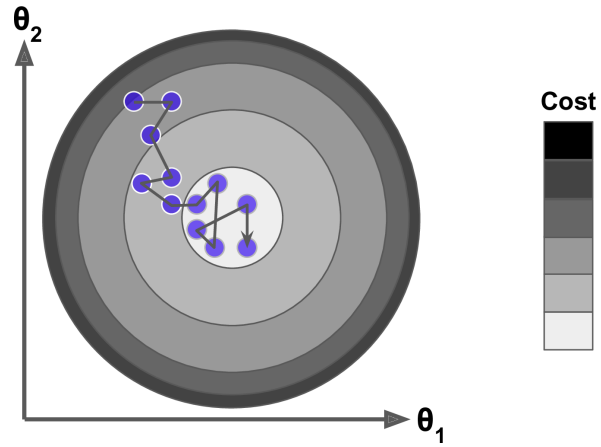
*Figura 4-9. Con el Descenso de gradiente estocástico, cada paso de entrenamiento es mucho más rápido pero también mucho más estocástico que cuando se utiliza el Descenso de gradiente por lotes.*


Cuando la función de costo es muy irregular (como en la Figura 4-6), esto puede ayudar al algoritmo a salir de los mínimos locales, por lo que el Descenso de Gradiente Estocástico tiene una mejor oportunidad de encontrar el mínimo global que el Descenso de Gradiente por Lotes. Por lo tanto, la aleatoriedad es buena para escapar de los óptimos locales, pero mala porque significa que el algoritmo nunca puede estabilizarse en el mínimo. Una solución a este dilema es reducir gradualmente la tasa de aprendizaje. Los pasos comienzan siendo grandes (lo que ayuda a hacer un progreso rápido y escapar de los mínimos locales), luego se hacen más pequeños y más pequeños, permitiendo que el algoritmo se estabilice en el mínimo global. Este proceso es similar al recocido simulado, un algoritmo inspirado en el proceso de recocido en metalurgia, donde el metal fundido se enfría lentamente. La función que determina la tasa de aprendizaje en cada iteración se llama programación de aprendizaje. Si la tasa de aprendizaje se reduce demasiado rápido, es posible que te quedes atascado en un mínimo local, o incluso termines congelado a medio camino del mínimo. Si la tasa de aprendizaje se reduce demasiado lentamente, es posible que saltes alrededor del mínimo durante mucho tiempo y termines con una solución subóptima si detienes el entrenamiento demasiado pronto.

Este código implementa el Descenso de Gradiente Estocástico utilizando un programación de aprendizaje simple:

In [61]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

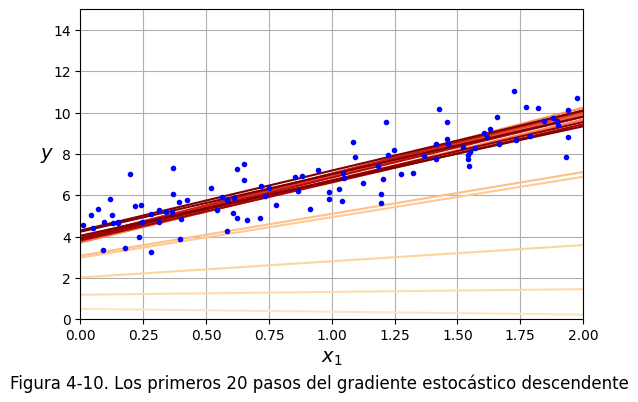

In [64]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.figtext(0.5,0.001,'Figura 4-10. Los primeros 20 pasos del gradiente estocástico descendente',fontsize=12, ha='center')
plt.show()

Por convención, iteramos en rondas de m iteraciones; cada ronda se llama una época. Mientras que el código del Descenso de Gradiente por Lotes iteraba 1,000 veces a través de todo el conjunto de entrenamiento, este código atraviesa el conjunto de entrenamiento solo 50 veces y alcanza una solución bastante buena.

In [65]:
theta

array([[4.21076011],
       [2.74856079]])

La Figura 4-10 muestra los primeros 20 pasos del entrenamiento (nota lo irregulares que son los pasos).

Ten en cuenta que dado que las instancias se eligen al azar, algunas instancias pueden ser seleccionadas varias veces por época, mientras que otras pueden no ser seleccionadas en absoluto. Si quieres asegurarte de que el algoritmo pase por cada instancia en cada época, otro enfoque es barajar el conjunto de entrenamiento (asegurándote de mezclar las características de entrada y las etiquetas conjuntamente), luego pasar por él instancia por instancia, luego volver a barajarlo, y así sucesivamente. Sin embargo, este enfoque es más complejo y generalmente no mejora el resultado.

**ADVERTENCIA**

Al usar el descenso de gradiente estocástico (SGD), las instancias de entrenamiento deben ser independientes e
idénticamente distribuidas (IID) para asegurar que los parámetros se acerquen al óptimo global, en promedio. Una manera
simple de garantizar esto es barajar las instancias durante el entrenamiento (por ejemplo, seleccionar cada instancia al
azar o barajar el conjunto de entrenamiento al inicio de cada época). Si no se barajan las instancias, por ejemplo, si
las instancias están ordenadas por etiqueta, entonces el SGD comenzará optimizando una etiqueta, luego la siguiente, y
así sucesivamente, y no se ajustará cerca del mínimo global.

Para realizar regresión lineal utilizando GD estocástico con Scikit-Learn, puedes utilizar la clase SGDRegressor, que por
defecto optimiza la función de costo MSE. El siguiente código se ejecuta durante un máximo de 1,000 épocas (max_iter) o
hasta que la pérdida disminuya en menos de 10 (tol) durante 100 épocas (n_iter_no_change). Comienza con una tasa de
aprendizaje de 0.01 (eta0), utilizando el programa de aprendizaje predeterminado (diferente del que utilizamos). Por
último, no utiliza ninguna regularización (penalty=None; más detalles sobre esto en breve).

In [66]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

Una vez más, obtienes una solución bastante cercana a la devuelta por la ecuación Normal:

In [67]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

**CONSEJO**

Todos los estimadores de Scikit-Learn se pueden entrenar utilizando el método fit(), pero algunos estimadores también
tienen un método partial_fit() que puedes llamar para ejecutar una sola ronda de entrenamiento en una o más instancias
(ignora hiperparámetros como max_iter o tol). Llamar repetidamente a partial_fit() entrenará gradualmente el modelo.
Esto es útil cuando necesitas más control sobre el proceso de entrenamiento. Otros modelos tienen un hiperparámetro
warm_start en su lugar (y algunos tienen ambos): si estableces warm_start=True, llamar al método fit() en un modelo
entrenado no reiniciará el modelo; simplemente continuará el entrenamiento donde lo dejó, respetando hiperparámetros
como max_iter y tol. Ten en cuenta que fit() restablece el contador de iteraciones utilizado por el programa de
aprendizaje, mientras que partial_fit() no lo hace.

### Descenso de Gradiente en Mini-Batches

El último algoritmo de descenso de gradiente que veremos se llama descenso de gradiente en mini-batches. Es
directo una vez que conoces el descenso de gradiente en lotes y el descenso de gradiente estocástico: en cada paso, en
lugar de calcular los gradientes basándose en el conjunto completo de entrenamiento (como en el descenso de gradiente en
lotes) o basándose en solo una instancia (como en el descenso de gradiente estocástico), el descenso de gradiente en
mini-batches calcula los gradientes en conjuntos pequeños y aleatorios de instancias llamados mini-batches. La ventaja
principal del descenso de gradiente en mini-batches sobre el descenso de gradiente estocástico es que puedes obtener un
impulso de rendimiento a partir de la optimización de hardware de operaciones matriciales, especialmente cuando se
utilizan GPUs.

El progreso del algoritmo en el espacio de parámetros es menos errático que con el descenso de gradiente estocástico,
especialmente con mini-batches bastante grandes. Como resultado, el descenso de gradiente en mini-batches terminará
caminando un poco más cerca del mínimo que el descenso de gradiente estocástico, pero puede ser más difícil que
escape de mínimos locales (en el caso de problemas que sufren de mínimos locales, a diferencia de la regresión lineal
con la función de costo MSE). La Figura 4-11 muestra los caminos tomados por los tres algoritmos de descenso de
gradiente en el espacio de parámetros durante el entrenamiento. Todos terminan cerca del mínimo, pero el camino de
GD en lotes realmente se detiene en el mínimo, mientras que tanto GD estocástico como GD en mini-batches continúan
caminando. Sin embargo, no olvides que GD en lotes tarda mucho tiempo en dar cada paso, y GD estocástico y GD en
mini-batches también alcanzarían el mínimo si se usara un buen programa de aprendizaje.


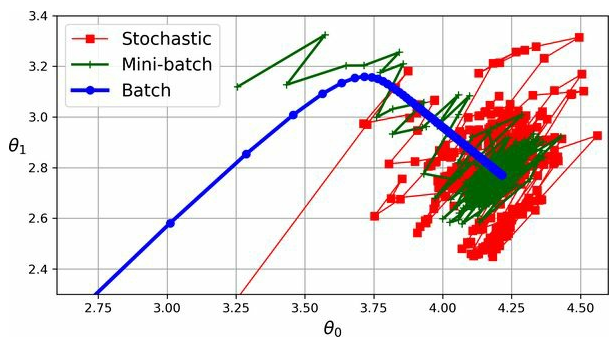

*Figura 4-11. Rutas de descenso de gradiente en el espacio de parámetros*


**Tabla 4-1** compara los algoritmos que hemos discutido hasta ahora para la regresión lineal (recuerda que $m$ es el número de instancias de entrenamiento y n es el número de características).

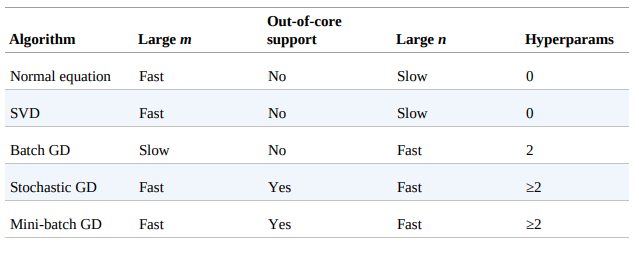

*Tabla 4-1. Comparación de algoritmos para regresión lineal.*

Después del entrenamiento, no hay casi diferencia: todos estos algoritmos terminan con modelos muy similares y hacen
predicciones de la misma manera.

## Regresión Polinomial

¿Qué pasa si tus datos son más complejos que una línea recta? Sorprendentemente, puedes usar un modelo lineal para
ajustar datos no lineales. Una manera simple de hacer esto es agregar potencias de cada característica como nuevas
características, y luego entrenar un modelo lineal con este conjunto extendido de características. Esta técnica se
llama regresión polinomial. Veamos un ejemplo. Primero, generaremos algunos datos no lineales (ver Figura 4-12), basados
en una ecuación cuadrática simple, que es una ecuación de la forma y = ax² + bx + c, más algo de ruido gaussiano:

In [68]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

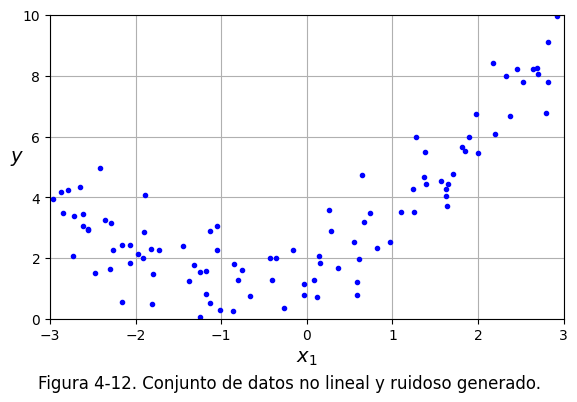

In [69]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.figtext(0.5,0.001,"Figura 4-12. Conjunto de datos no lineal y ruidoso generado.",fontsize=12, ha='center')
plt.show()

Claramente, una línea recta nunca ajustará bien estos datos. Así que usemos la clase PolynomialFeatures de ScikitLearn para transformar nuestros datos de entrenamiento, agregando el cuadrado (polinomio de segundo grado) de cada
característica en el conjunto de entrenamiento como una nueva característica (en este caso, solo hay una característica):

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [71]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly ahora contiene la característica original de X más el cuadrado de esta característica. Ahora podemos ajustar un
modelo LinearRegression a estos datos de entrenamiento extendidos (ver Figura 4-13):

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

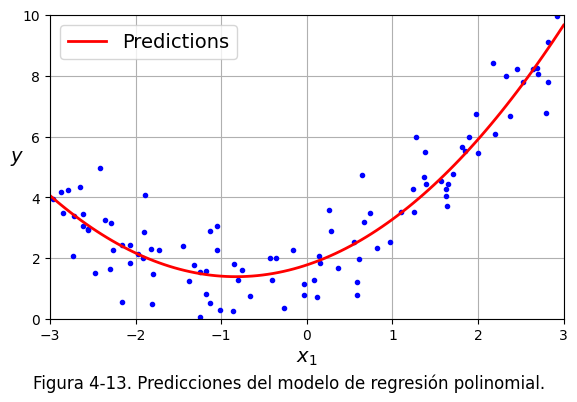

In [74]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.figtext(0.5,0.001,"Figura 4-13. Predicciones del modelo de regresión polinomial.",fontsize=12, ha='center')
save_fig("quadratic_predictions_plot")
plt.show()

No está mal: el modelo estima $\hat{y} = 0.56 x_1^2 + 0.93 x_1 + 1.78$ cuando de hecho la función original era $y = 0.5 x_1^2 + 1.0 x 1 + 2.0 + $ $ruido$ $gaussiano$. 

Ten en cuenta que cuando hay múltiples características, la regresión polinomial
puede encontrar relaciones entre características, algo que un modelo de regresión lineal simple no puede hacer. Esto es posible gracias a que PolynomialFeatures también agrega todas las combinaciones de características hasta el grado dado. Por ejemplo, si hubiera dos características a y b, PolynomialFeatures con degree=3 no solo agregaría las
características $a^2$ , $a$ , $b^2$ , y $b^3$ , sino también las combinaciones $ab$, $a^2b$, y $ab^2$.

**ADVERTENCIA**

`PolynomialFeatures(degree=d)` transforma un arreglo que contiene $n$ características en un arreglo que contiene $\frac{(n + d)!}{d! \, n!}$ características, donde $n!$ es el factorial de $n$, igual a $1 \times 2 \times 3 \times \ldots \times n$.
¡Cuidado con la explosión combinatoria del número de características!


# Curvas de Aprendizaje

Si realizas una regresión polinómica de alto grado, probablemente ajustará los datos de entrenamiento mucho mejor que con una regresión lineal simple. Por ejemplo, la Figura 4-14 aplica un modelo polinómico de grado 300 a los datos de entrenamiento anteriores y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinomio de segundo grado). Observa cómo el modelo polinómico de grado 300 se ajusta para acercarse lo más posible a las instancias de entrenamiento.

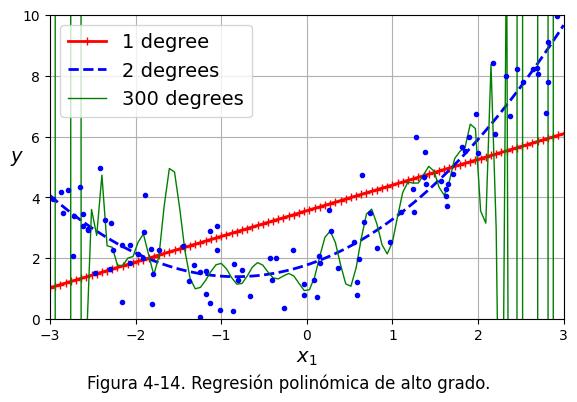

In [76]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.figtext(0.5,0.001,"Figura 4-14. Regresión polinómica de alto grado.",fontsize=12, ha='center')
save_fig("high_degree_polynomials_plot")
plt.show()

Este modelo de regresión polinómica de alto grado está sobreajustando gravemente los datos de entrenamiento, mientras que el modelo lineal está subajustando. El modelo que mejor generalizará en este caso es el modelo cuadrático, lo cual tiene sentido porque los datos fueron generados utilizando un modelo cuadrático. Pero, en general, no sabrás qué función generó los datos, entonces, ¿cómo puedes decidir qué tan complejo debe ser tu modelo? ¿Cómo puedes saber si tu modelo está sobreajustando o subajustando los datos?

En el Capítulo 2 utilizaste la validación cruzada para obtener una estimación del rendimiento de generalización de un modelo. Si un modelo funciona bien en los datos de entrenamiento pero generaliza mal según las métricas de validación cruzada, entonces tu modelo está sobreajustando. Si funciona mal en ambos, entonces está subajustando. Esta es una forma de saber cuándo un modelo es demasiado simple o demasiado complejo.

Otra forma de saberlo es observar las curvas de aprendizaje, que son gráficos del error de entrenamiento y del error de validación en función de la iteración de entrenamiento: simplemente evalúa el modelo a intervalos regulares durante el entrenamiento tanto en el conjunto de entrenamiento como en el conjunto de validación, y grafica los resultados. Si el modelo no puede ser entrenado incrementalmente (es decir, si no soporta `partial_fit()` o `warm_start`), entonces debes entrenarlo varias veces en subconjuntos gradualmente más grandes del conjunto de entrenamiento.

Scikit-Learn tiene una función útil llamada `learning_curve()` para ayudar con esto: entrena y evalúa el modelo utilizando validación cruzada. Por defecto, vuelve a entrenar el modelo en subconjuntos crecientes del conjunto de entrenamiento, pero si el modelo soporta aprendizaje incremental puedes establecer `exploit_incremental_learning=True` al llamar a `learning_curve()` y entrenará el modelo incrementalmente en su lugar. La función devuelve los tamaños del conjunto de entrenamiento en los que evaluó el modelo, y las puntuaciones de entrenamiento y validación que midió para cada tamaño y para cada pliegue de validación cruzada. Usemos esta función para observar las curvas de aprendizaje del modelo de regresión lineal simple (ver Figura 4-15):


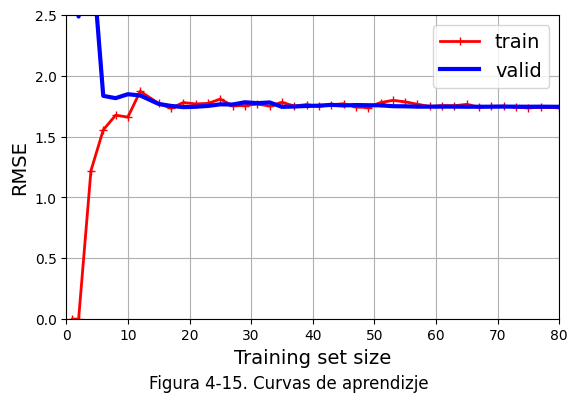

In [77]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.figtext(0.5,0.001,"Figura 4-15. Curvas de aprendizje",fontsize=12, ha='center')
save_fig("underfitting_learning_curves_plot")

plt.show()

Este modelo está subajustando. Para entender por qué, primero observemos el error de entrenamiento. Cuando solo hay una o dos instancias en el conjunto de entrenamiento, el modelo puede ajustarlas perfectamente, por lo que la curva comienza en cero. Pero a medida que se añaden nuevas instancias al conjunto de entrenamiento, se vuelve imposible para el modelo ajustar perfectamente los datos de entrenamiento, tanto porque los datos son ruidosos como porque no son lineales en absoluto. Por lo tanto, el error en los datos de entrenamiento aumenta hasta que alcanza una meseta, momento en el cual agregar nuevas instancias al conjunto de entrenamiento no mejora ni empeora mucho el error promedio. Ahora observemos el error de validación. Cuando el modelo se entrena con muy pocas instancias de entrenamiento, es incapaz de generalizar adecuadamente, por lo que el error de validación es inicialmente bastante grande. Luego, a medida que el modelo se expone a más ejemplos de entrenamiento, aprende, y así el error de validación disminuye lentamente. Sin embargo, una vez más, una línea recta no puede modelar adecuadamente los datos, por lo que el error termina en una meseta, muy cerca de la otra curva.

Estas curvas de aprendizaje son típicas de un modelo que está subajustando. Ambas curvas han alcanzado una meseta; están cerca y bastante altas.

>**TIP:**
>Si tu modelo está subajustando los datos de entrenamiento, agregar más ejemplos de entrenamiento no ayudará. Necesitas usar un mejor modelo o crear mejores características.

Ahora observemos las curvas de aprendizaje de un modelo polinómico de décimo grado en los mismos datos (ver Figura 4-16):

In [78]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

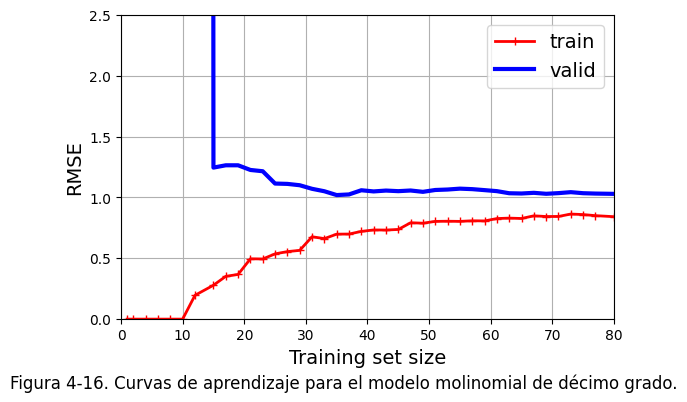

In [79]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.figtext(0.5,0.001,"Figura 4-16. Curvas de aprendizaje para el modelo molinomial de décimo grado.",fontsize=12, ha='center')
save_fig("learning_curves_plot")
plt.show()

Estas curvas de aprendizaje se parecen un poco a las anteriores, pero hay dos diferencias muy importantes:

- El error en los datos de entrenamiento es mucho menor que antes.
- Hay una brecha entre las curvas. Esto significa que el modelo funciona significativamente mejor en los datos de entrenamiento que en los datos de validación, lo cual es un signo distintivo de un modelo que está sobreajustando. Sin embargo, si usas un conjunto de entrenamiento mucho más grande, las dos curvas continuarían acercándose.

>**TIP**
>Una forma de mejorar un modelo que está sobreajustando es alimentarlo con más datos de entrenamiento hasta que el error de validación alcance el error de entrenamiento.

> $\textbf{La compensación sesgo/varianza}$
>Un resultado teórico importante de la estadística y el aprendizaje automático es el hecho de que el error de generalización de un modelo puede expresarse como la suma de tres errores muy diferentes:
> - **Sesgo**: Esta parte del error de generalización se debe a suposiciones incorrectas, como asumir que los datos son lineales cuando en realidad son cuadráticos. Un modelo con alto sesgo probablemente subajustará los datos de entrenamiento.
> - **Varianza**: Esta parte se debe a la excesiva sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Un modelo con muchos grados de libertad (como un modelo polinómico de alto grado) probablemente tenga alta varianza y, por lo tanto, sobreajustará los datos de entrenamiento.
> - **Error irreducible**: Esta parte se debe al ruido en los propios datos. La única forma de reducir esta parte del error es limpiar los datos (por ejemplo, corregir las fuentes de datos, como sensores rotos, o detectar y eliminar valores atípicos).
> Aumentar la complejidad de un modelo típicamente aumentará su varianza y reducirá su sesgo. Por el contrario, reducir la complejidad de un modelo aumenta su sesgo y reduce su varianza. Por eso se llama una compensación.

# Regularized Linear Models

Como vimos en los Capítulos 1 y 2, una buena manera de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo): cuántos menos grados de libertad tenga, más difícil será que sobreajuste los datos. Una forma simple de regularizar un modelo polinomial es reducir el número de grados polinomiales. 


Para un modelo lineal, la regularización generalmente se logra restringiendo los pesos del modelo. Ahora veremos la Regresión Ridge, la Regresión Lasso y Elastic Net, que implementan tres formas diferentes de restringir los pesos.

### Regresión Ridge

La Regresión Ridge (también llamada regularización de Tikhonov) es una versión regularizada de la Regresión Lineal: se añade un término de regularización igual a $\alpha \sum_{i=1}^{n} \theta_i^2$ a la función de costo. Esto fuerza al algoritmo de aprendizaje no solo a ajustar los datos, sino también a mantener los pesos del modelo lo más pequeños posible. Ten en cuenta que el término de regularización solo debe añadirse a la función de costo durante el entrenamiento. Una vez que el modelo está entrenado, se debe utilizar la medida de rendimiento no regularizada para evaluar el rendimiento del modelo.

>**NOTA:** 
>Es bastante común que la función de costo utilizada durante el entrenamiento sea diferente de la medida de rendimiento utilizada para las pruebas. Aparte de la regularización, otra razón por la que pueden ser diferentes es que una buena función de costo de entrenamiento debe tener derivadas optimizadas para la optimización, mientras que la medida de rendimiento utilizada para las pruebas debe ser lo más cercana posible al objetivo final. Por ejemplo, los clasificadores a menudo se entrenan usando una función de costo como la pérdida logarítmica (discutida en un momento), pero se evalúan usando precisión/recall.

El hiperparámetro $\alpha$ controla cuánto se desea regularizar el modelo. Si $\alpha = 0$, entonces la Regresión Ridge es simplemente Regresión Lineal. Si $\alpha$ es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado es una línea plana que pasa por la media de los datos. La Ecuación 4-8 presenta la función de costo de la Regresión Ridge.

**Ecuación 4-8. Función de costo de la Regresión Ridge**

$$
J(\boldsymbol{\theta)} = MSE(\boldsymbol{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2
$$

Ten en cuenta que el término de sesgo $\theta_0$ no está regularizado (la suma comienza en $i = 1$, no en $0$). Si definimos $\mathbf{w}$ como el vector de pesos de las características ($\theta_1$ a $\theta_n$), entonces el término de regularización es igual a $\frac{1}{2}(\| \mathbf{w} \|_2)^2$, donde $\| \mathbf{w} \|_2$ representa la norma $\ell_2$ del vector de pesos. Para el Descenso de Gradiente, simplemente agrega $\alpha \mathbf{w}$ al vector gradiente del MSE (Ecuación 4-6).

>**ADVERTENCIA:** 
>Es importante escalar los datos (por ejemplo, utilizando un `StandardScaler`) antes de realizar la Regresión Ridge, ya que es sensible a la escala de las características de entrada. Esto es cierto para la mayoría de los modelos regularizados.

La Figura 4-17 muestra varios modelos Ridge entrenados en algunos datos lineales usando diferentes valores de $\alpha$. A la izquierda, se utilizan modelos Ridge simples, lo que lleva a predicciones lineales. A la derecha, los datos se expanden primero utilizando `PolynomialFeatures(degree=10)`, luego se escalan utilizando un `StandardScaler`, y finalmente se aplican los modelos Ridge a las características resultantes: esto es Regresión Polinomial con regularización Ridge. Nota cómo el aumento de $\alpha$ lleva a predicciones más planas (es decir, menos extremas, más razonables), reduciendo así la varianza del modelo pero aumentando su sesgo.

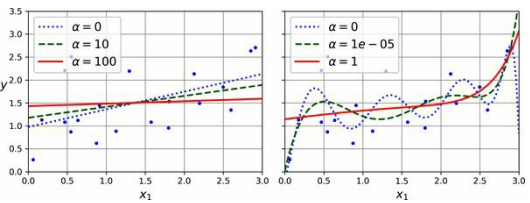

*Figura 4-17. Un modelo lineal (izquierda) y un modelo polinómico (derecha), ambos con varios niveles de regularización de Ridge.*

Al igual que con la Regresión Lineal, podemos realizar la Regresión Ridge ya sea mediante el cálculo de una ecuación de forma cerrada o mediante la realización de Descenso de Gradiente. Los pros y los contras son los mismos. La Ecuación 4-9 muestra la solución de forma cerrada, donde $A$ es la matriz identidad de $(n + 1) \times (n + 1)$, excepto con un 0 en la celda superior izquierda, correspondiente al término de sesgo.

Ecuación 4-9. Solución de forma cerrada para Regresión Ridge
$$
\hat{\boldsymbol{\theta}} = (X^\top X + \alpha A)^{-1} X^\top \mathbf{y}
$$

Aquí se muestra cómo realizar la Regresión Ridge con Scikit-Learn usando una solución de forma cerrada (una variante de la Ecuación 4-9 que utiliza una técnica de factorización de matrices por André-Louis Cholesky):


In [36]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

Y usando el gradiente descendente estocástico:

In [38]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [39]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55321535]])

In [40]:
# extra code – shows the closed form solution of Ridge regression,
#              compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [41]:
ridge_reg.intercept_, ridge_reg.coef_  # extra code

(array([0.97944909]), array([[0.38251084]]))

El hiperparámetro de penalización establece el tipo de término de regularización a usar.
Especificar "l2" indica que quieres que SGD añada un término de regularización a la
función de costo igual a la mitad del cuadrado de la norma $\ell_2$ del vector de pesos: esto es
simplemente Ridge Regression.

### Regresión Lasso 

La Regresión de Mínimos Absolutos y Selección de Operadores (generalmente llamada
simplemente Lasso Regression) es otra versión regularizada de la Regresión Lineal:
igual que Ridge Regression, añade un término de regularización a la función de costo, pero
usa la norma $\ell_1$ del vector de pesos en lugar de la mitad del cuadrado de la norma $\ell_2$
(ver la Ecuación 4-10).


#### Ecuación 4-10. Función de costo de Lasso Regression

$$
J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + \alpha \sum_{i=1}^{n} |\theta_i|
$$

La Figura 4-18 muestra lo mismo que la Figura 4-17 pero reemplaza los modelos Ridge con
modelos Lasso y usa valores $\alpha$ más pequeños.

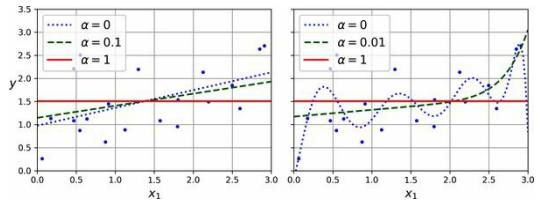

*Figura 4-18. Modelos lineales (izquierda) y polinomiales (derecha), ambos utilizando varios niveles de regularización de lazo.*

Un característica importante de Lasso Regression es que tiende a eliminar los
pesos de las características menos importantes (es decir, los establece en cero). Por ejemplo, la
línea discontinua en el gráfico de la derecha en la Figura 4-18 (con $\alpha = 10^{-7}$) parece cuadrática,
casi lineal: todos los pesos para las características de alto grado polinómico son igual a cero. En
otras palabras, Lasso Regression realiza automáticamente la selección de características y
produce un modelo disperso (es decir, con pocos pesos de características diferentes de cero).

Puedes tener una idea de por qué es así observando la Figura 4-19: los ejes
representan dos parámetros del modelo, y los contornos de fondo representan diferentes
funciones de pérdida. En el gráfico superior izquierdo, los contornos representan la pérdida $\ell_1$ 
($|\theta_1| + |\theta_2|$),
que disminuye linealmente a medida que te acercas a cualquier eje. Por ejemplo, si inicializas
los parámetros del modelo en $\theta_1 = 2$ y $\theta_2 = 0.5$, ejecutar Descenso de Gradiente 
decrementará ambos parámetros por igual (como se representa por la línea amarilla discontinua);
por lo tanto, $\theta_2$ alcanzará 0 primero (ya que estaba más cerca de 0 al principio). Después de eso,
el Descenso de Gradiente bajará por el canal hasta que alcance $\theta_1 = 0$ (con un poco de
rebote, ya que los gradientes de $\ell_1$ nunca se acercan a 0: son ya sea -1
o 1 para cada parámetro). En el gráfico superior derecho, los contornos representan la función de costo de Lasso 
(es decir, una función de costo MSE más una pérdida $\ell_1$). Los pequeños círculos blancos
muestran el camino que el Descenso de Gradiente toma para optimizar algunos parámetros del modelo
que se inicializaron alrededor de $\theta_1 = 0.25$ y $\theta_2 = -1$: observa una vez más cómo el
camino alcanza rápidamente $\theta_1 = 0$, luego baja por el canal y termina rebotando
alrededor del óptimo global (representado por el cuadrado rojo). Si aumentáramos $\alpha$,
el óptimo global se movería hacia la izquierda a lo largo de la línea amarilla discontinua, mientras que si
disminuyéramos $\alpha$, el óptimo global se movería hacia la derecha (en este ejemplo, los parámetros óptimos
para el MSE no regularizado son $\theta_1 = 2$ y $\theta_2 = 0.5$).


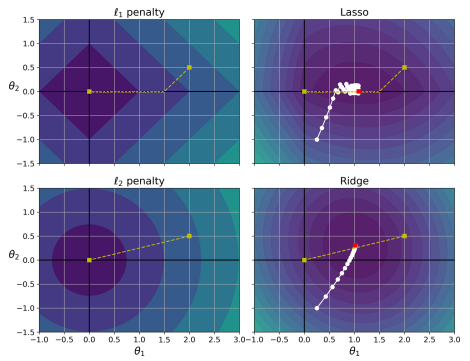

*Figura 4-19. Regularización de Lasso vs Ridge*

Los dos gráficos inferiores muestran lo mismo pero con una penalización $\ell_2$. En el
gráfico inferior izquierdo, puedes ver que la pérdida $\ell_2$ disminuye con la distancia al
origen, por lo que el Descenso de Gradiente simplemente toma un camino recto hacia ese punto. En el
gráfico inferior derecho, los contornos representan la función de costo de Ridge Regression (es decir,
una función de costo MSE más una pérdida $\ell_2$). Hay dos diferencias principales con
Lasso. Primero, los gradientes se hacen más pequeños a medida que los parámetros se acercan al óptimo global, 
por lo que el Descenso de Gradiente naturalmente disminuye la velocidad, lo que ayuda a la convergencia
(ya que no hay rebote). Segundo, los parámetros óptimos (representados por el cuadrado rojo) se
acercan cada vez más al origen cuando aumentas $\alpha$, pero nunca se eliminan completamente.

>TIP: Para evitar que el Descenso de Gradiente rebote alrededor del óptimo al final cuando usas Lasso,
necesitas reducir gradualmente la tasa de aprendizaje durante el entrenamiento (todavía rebotará alrededor del
óptimo, pero los pasos se harán cada vez más pequeños, por lo que convergerá).

La función de costo de Lasso no es diferenciable en $\theta_i = 0$ (para $i = 1, 2, \ldots, n$), pero
el Descenso de Gradiente aún funciona bien si usas un vector subgradiente $\mathbf{g}$ en su lugar
cuando cualquier $\theta_i = 0$. La Ecuación 4-11 muestra una ecuación del vector subgradiente que puedes usar
para el Descenso de Gradiente con la función de costo de Lasso.

#### Ecuación 4-11. Vector subgradiente de Lasso Regression

$$
g(\boldsymbol{\theta}, J) = \nabla_{\boldsymbol{\theta}} MSE(\boldsymbol{\theta}) + \alpha \begin{pmatrix}
\text{sign}(\theta_1) \\
\text{sign}(\theta_2) \\
\vdots \\
\text{sign}(\theta_n)
\end{pmatrix}
$$

donde $\text{sign}(\theta_i) = \begin{cases}
-1 & \text{si} \ \theta_i < 0 \\
0 & \text{si} \ \theta_i = 0 \\
+1 & \text{si} \ \theta_i > 0
\end{cases}$

Aquí hay un pequeño ejemplo de Scikit-Learn usando la clase `Lasso`:

In [42]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Nota que podrías usar `SGDRegressor(penalty="l1")`.


### Elastic Net

Elastic Net es un punto intermedio entre Ridge Regression y Lasso Regression. El término de regularización es una mezcla simple de los términos de regularización de Ridge y Lasso, y puedes controlar la proporción de mezcla $r$. Cuando $r = 0$, Elastic Net es equivalente a Ridge Regression, y cuando $r = 1$, es equivalente a Lasso Regression (ver Ecuación 4-12).

#### Ecuación 4-12. Función de costo de Elastic Net
$$J(\boldsymbol{\theta}) = MSE(\boldsymbol{\theta}) + r\alpha\sum_{i=1}^{n}|\theta_i| + \frac{1-r}{2} \alpha\sum_{i=1}^{n} \theta_i^2$$


Entonces, ¿cuándo deberías usar una Regresión Lineal simple (es decir, sin ninguna regularización), Ridge, Lasso, o Elastic Net? Casi siempre es preferible tener al menos un poco de regularización, así que generalmente deberías evitar la Regresión Lineal simple. Ridge es una buena opción por defecto, pero si sospechas que solo unas pocas características son útiles, deberías preferir Lasso o Elastic Net porque tienden a reducir a cero los pesos de las características inútiles, como hemos discutido. En general, Elastic Net se prefiere sobre Lasso porque Lasso puede comportarse de manera errática cuando el número de características es mayor que el número de instancias de entrenamiento o cuando varias características están fuertemente correlacionadas.

Aquí hay un ejemplo corto que utiliza `ElasticNet` de Scikit-Learn (`l1_ratio` corresponde a la proporción de mezcla $r$):


In [45]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

Una forma muy diferente de regularizar algoritmos de aprendizaje iterativos como Gradient Descent es detener el entrenamiento tan pronto como el error de validación alcance un mínimo. Esto se llama early stopping. La Figura 4-20 muestra un modelo complejo (en este caso, un modelo de Regresión Polinómica de alto grado) siendo entrenado con Batch Gradient Descent. A medida que pasan las épocas, el algoritmo aprende, y su error de predicción (RMSE) en el conjunto de entrenamiento disminuye, junto con su error de predicción en el conjunto de validación. Sin embargo, después de un tiempo, el error de validación deja de disminuir y comienza a subir. Esto indica que el modelo ha comenzado a sobreajustar los datos de entrenamiento. Con early stopping simplemente detienes el entrenamiento tan pronto como el error de validación alcanza el mínimo. Es una técnica de regularización tan simple y eficiente que Geoffrey Hinton la llamó un “hermoso almuerzo gratis”.

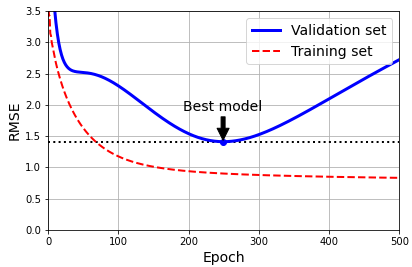

*Figura 4-20. Regularización de parada anticipada*

TIP: Con Gradient Descent Estocástico y Mini-batch, las curvas no son tan suaves, y puede ser difícil saber si has alcanzado el mínimo o no. Una solución es detenerse solo después de que el error de validación haya estado por encima del mínimo durante un tiempo (cuando estés seguro de que el modelo no mejorará), y luego retroceder los parámetros del modelo al punto donde el error de validación estaba en un mínimo.

Implementación básica de early stopping:

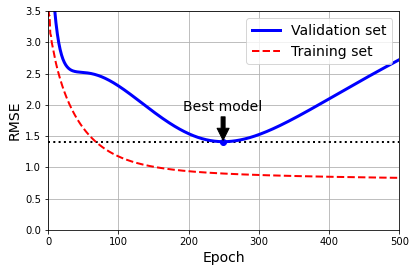

In [46]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#" p uede estar mal este codigo"
# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

Nota que con `warm_start=True`, cuando se llama al método `fit()`, continúa el entrenamiento donde lo dejó, en lugar de reiniciar desde cero.


## Regresión Logística

Como discutimos en el Capítulo 1, algunos algoritmos de regresión pueden ser utilizados para clasificación (y viceversa). La Regresión Logística (también llamada Regresión Logit) se usa comúnmente para estimar la probabilidad de que una instancia pertenezca a una clase particular (por ejemplo, ¿cuál es la probabilidad de que este correo electrónico sea spam?). Si la probabilidad estimada es mayor del 50%, entonces el modelo predice que la instancia pertenece a esa clase (llamada la clase positiva, etiquetada como “1”), y de lo contrario predice que no pertenece (es decir, pertenece a la clase negativa, etiquetada como “0”). Esto lo convierte en un clasificador binario.

### Estimación de probabilidades

Entonces, ¿cómo funciona la Regresión Logística? Al igual que un modelo de Regresión Lineal, un modelo de Regresión Logística calcula una suma ponderada de las características de entrada (más un término de sesgo), pero en lugar de dar el resultado directamente como lo hace el modelo de Regresión Lineal, da el logístico de este resultado (ver Ecuación 4-13).

##### Ecuación 4-13. Probabilidad estimada del modelo de Regresión Logística (forma vectorizada)
$$\hat{p} = h{\mathbf{\theta(x)}} = \sigma(\mathbf{x}^\top \boldsymbol{\theta})$$

La función logística, notada como $\sigma(\cdot)$, es una función sigmoidea (es decir, en forma de S) que da un número entre 0 y 1. Se define como se muestra en la Ecuación 4-14 y en la Figura 4-21.

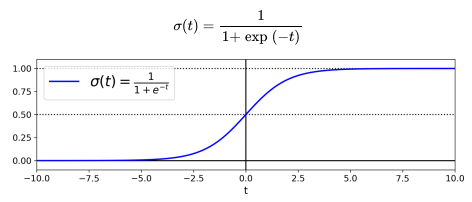

*Figura 4-21. Función logística*

Una vez que el modelo de Regresión Logística ha estimado la probabilidad $\hat{p} = h_{\boldsymbol{\theta}} (\mathbf{x})$ de que una instancia $\mathbf{x}$ pertenezca a la clase positiva, puede hacer su predicción $\hat{y}$ fácilmente (ver Ecuación 4-15).

##### Ecuación 4-15. Predicción del modelo de Regresión Logística
$$
\hat{y} = 
\begin{cases} 
0 & \text{si} \ \hat{p} < 0.5 \\ 
1 & \text{si} \ \hat{p} \geq 0.5 
\end{cases}
$$

Nota que $\sigma(t) < 0.5$ cuando $t < 0$, y $\sigma(t) \geq 0.5$ cuando $t \geq 0$, por lo que un modelo de Regresión Logística predice 1 si $\mathbf{x}^\top \boldsymbol{\theta}$ es positivo y 0 si es negativo.

>**Nota:** La puntuación $t$ a menudo se llama logit. El nombre proviene del hecho de que la función logit, definida como $\text{logit}(p) = \log\left(\frac{p}{1 - p}\right)$, es la inversa de la función logística. De hecho, si calculas el logit de la probabilidad estimada $p$, encontrarás que el resultado es $t$. El logit también se llama las log-odds, ya que es el logaritmo de la relación entre la probabilidad estimada para la clase positiva y la probabilidad estimada para la clase negativa.


### Entrenamiento y Función de Costo


Ahora sabes cómo un modelo de Regresión Logística estima probabilidades y hace predicciones. Pero, ¿cómo se entrena? El objetivo del entrenamiento es establecer el vector de parámetros $\boldsymbol{\theta}$ de manera que el modelo estime altas probabilidades para las instancias positivas ($y = 1$) y bajas probabilidades para las instancias negativas ($y = 0$). Esta idea se captura mediante la función de costo mostrada en la Ecuación 4-16 para una sola instancia de entrenamiento $\mathbf{x}$.


##### Ecuación 4-16. Función de costo de una sola instancia de entrenamiento
$$
c(\boldsymbol{\theta}) = 
\begin{cases} 
- \log(\hat{p}) & \text{si} \ y = 1 \\ 
- \log(1 - \hat{p}) & \text{si} \ y = 0 
\end{cases}
$$

Esta función de costo tiene sentido porque $-\log(t)$ crece mucho cuando $t$ se acerca a 0, por lo que el costo será grande si el modelo estima una probabilidad cercana a 0 para una instancia positiva, y también será muy grande si el modelo estima una probabilidad cercana a 1 para una instancia negativa. Por otro lado, $-\log(t)$ está cerca de 0 cuando $t$ está cerca de 1, por lo que el costo será cercano a 0 si la probabilidad estimada está cerca de 0 para una instancia negativa o cerca de 1 para una instancia positiva, que es precisamente lo que queremos.

La función de costo sobre todo el conjunto de entrenamiento es el costo promedio sobre todas las instancias de entrenamiento. Se puede escribir en una sola expresión llamada la pérdida logarítmica, mostrada en la Ecuación 4-17.

##### Ecuación 4-17. Función de costo de la Regresión Logística (pérdida logarítmica)
$$J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)})\log\left(1 - \hat{p}^{(i)}\right) \right]$$

La mala noticia es que no hay una ecuación cerrada conocida para calcular el valor de $\boldsymbol{\theta}$ que minimiza esta función de costo (no hay un equivalente de la Ecuación Normal). La buena noticia es que esta función de costo es convexa, por lo que Gradient Descent (u otro algoritmo de optimización) está garantizado para encontrar el mínimo global (si la tasa de aprendizaje no es demasiado grande y esperas lo suficiente). Las derivadas parciales de la función de costo con respecto al parámetro $j$ del modelo $\theta_j$ se dan en la Ecuación 4-18.

##### Ecuación 4-18. Derivadas parciales de la función de costo logística

$$
\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\boldsymbol{\theta}^\top \mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}
$$


Esta ecuación se parece mucho a la Ecuación 4-5: para cada instancia, calcula el error de predicción y lo multiplica por el valor de la característica $j^{th}$, y luego calcula el promedio sobre todas las instancias de entrenamiento. Una vez que tienes el vector de gradiente que contiene todas las derivadas parciales, puedes usarlo en el algoritmo de Descenso por Gradiente por Lotes (Batch Gradient Descent). Eso es todo: ahora sabes cómo entrenar un modelo de Regresión Logística. Para el Descenso por Gradiente Estocástico (Stochastic GD), tomarías una instancia a la vez, y para el Descenso por Gradiente por Mini-lotes (Mini-batch GD), usarías un mini-lote a la vez.


### Fronteras de Desición

Usemos el conjunto de datos de iris para ilustrar la Regresión Logística. Este es un conjunto de datos famoso que contiene la longitud y el ancho del sépalo y el pétalo de 150 flores de iris de tres especies diferentes: Iris setosa, Iris versicolor e Iris virginica (ver Figura 4-22).

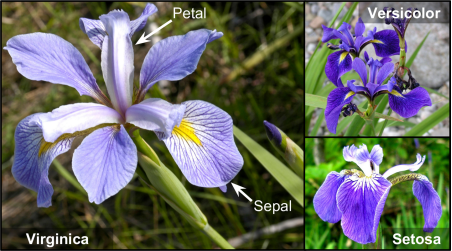
*Figura 4-22. Flores de tres especies de plantas de iris.*

Vamos a intentar construir un clasificador para detectar el tipo Iris virginica basándonos solo en la característica del ancho del pétalo. Primero carguemos los datos:



In [48]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [49]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [50]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [51]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int64

In [52]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

A continuación dividiremos los datos y entrenaremos un modelo de regresión logística en el conjunto de entrenamiento:

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Veamos las probabilidades estimadas del modelo para flores con anchos de pétalos que varían de 0 cm a 3 cm (Figura 4-23):

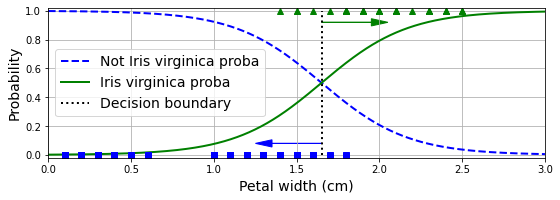

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

El ancho del pétalo de las flores Iris virginica (representado por triángulos) varía de 1.4 cm a 2.5 cm, mientras que las otras flores de iris (representadas por cuadrados) generalmente tienen un ancho de pétalo más pequeño, que varía de 0.1 cm a 1.8 cm. Nota que hay un poco de solapamiento. Por encima de aproximadamente 2 cm, el clasificador está altamente seguro de que la flor es una Iris virginica (produce una alta probabilidad para esa clase), mientras que por debajo de 1 cm, está altamente seguro de que no es una Iris virginica (alta probabilidad para la clase "No Iris virginica"). Entre estos extremos, el clasificador no está seguro. Sin embargo, si le pides que prediga la clase (usando el método `predict()` en lugar del método `predict_proba()`), devolverá la clase que sea más probable. Por lo tanto, hay una frontera de decisión alrededor de 1.6 cm donde ambas probabilidades son iguales al 50%: si el ancho del pétalo es mayor a 1.6 cm, el clasificador predice que la flor es una Iris virginica, y de lo contrario predice que no lo es (incluso si no está muy seguro).


In [55]:
decision_boundary

1.6516516516516517

In [56]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

La Figura 4-24 muestra el mismo conjunto de datos, pero esta vez mostrando dos características: ancho y longitud del pétalo. Una vez entrenado, el clasificador de Regresión Logística puede, basándose en estas dos características, estimar la probabilidad de que una nueva flor sea una Iris virginica. La línea discontinua representa los puntos donde el modelo estima una probabilidad del 50%: esta es la frontera de decisión del modelo. Nota que es una frontera lineal. Cada línea paralela representa los puntos donde el modelo produce una probabilidad específica, desde el 15% (abajo a la izquierda) hasta el 90% (arriba a la derecha). Todas las flores más allá de la línea superior derecha tienen más del 90% de probabilidad de ser Iris virginica, según el modelo.

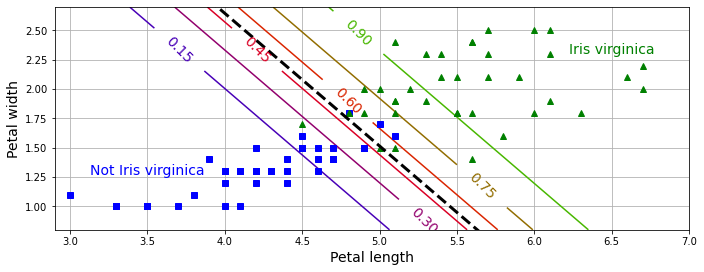

In [57]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

>**NOTA**: El hiperparámetro que controla la fuerza de regularización de un modelo LogisticRegression en Scikit-Learn no es $\alpha$ (como en otros modelos lineales), sino su inverso: $C$. Cuanto mayor sea el valor de $C$, menos regularizado estará el modelo.

Al igual que otros modelos lineales, los modelos de Regresión Logística pueden ser regularizados usando penalizaciones $\ell_1$ o $\ell_2$. Scikit-Learn en realidad añade una penalización $\ell_2$ por defecto.


### Regresión Softmax

El modelo de Regresión Logística puede generalizarse para soportar múltiples clases directamente, sin tener que entrenar y combinar múltiples clasificadores binarios (como se discutió en el Capítulo 3). Esto se llama Regresión Softmax, o Regresión Logística Multinomial.

La idea es simple: cuando se le da una instancia $\mathbf{x}$, el modelo de Regresión Softmax primero calcula una puntuación $s_k(\mathbf{x})$ para cada clase $k$, luego estima la probabilidad de cada clase aplicando la función softmax (también llamada exponencial normalizada) a las puntuaciones. La ecuación para calcular $s_k(\mathbf{x})$ debería parecer familiar, ya que es igual a la ecuación para la predicción de Regresión Lineal (ver Ecuación 4-19).

Ecuación 4-19. Puntuación Softmax para la clase $k$

$$
s_k(\mathbf{x}) = \mathbf{x}^\top \boldsymbol{\theta}^{(k)} 
$$

Nota que cada clase tiene su propio vector de parámetros $\boldsymbol{\theta}^k$. Todos estos vectores se almacenan típicamente como filas en una matriz de parámetros $\Theta$.

Una vez que has calculado la puntuación de cada clase para la instancia $\mathbf{x}$, puedes estimar la probabilidad $\hat{p}_k$ de que la instancia pertenezca a la clase $k$ ejecutando las puntuaciones a través de la función softmax (Ecuación 4-20). La función calcula la exponencial de cada puntuación, luego las normaliza (dividiendo por la suma de todas las exponenciales). Las puntuaciones generalmente se llaman logits o log-odds (aunque en realidad son log-odds no normalizados).

Ecuación 4-20. Función Softmax

$$
\hat{p}_k = \sigma(s(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}
$$

En esta ecuación:
- $K$ es el número de clases.
- $s(\mathbf{x})$ es un vector que contiene las puntuaciones de cada clase para la instancia $\mathbf{x}$.
- $\sigma(s(\mathbf{x}))_k$ es la probabilidad estimada de que la instancia $\mathbf{x}$ pertenezca a la clase $k$, dadas las puntuaciones de cada clase para esa instancia.

Al igual que el clasificador de Regresión Logística, el clasificador de Regresión Softmax predice la clase con la mayor probabilidad estimada (que es simplemente la clase con la mayor puntuación), como se muestra en la Ecuación 4-21.

Ecuación 4-21. Predicción del clasificador de Regresión Softmax

$$
\hat{y} = \arg\max_{k} \sigma(s(\mathbf{x}))_k = \arg\max_{k} s_k(\mathbf{x}) = \arg\max_{k} ((\boldsymbol{\theta}^{(k)})^\top \mathbf{x})
$$

El operador $\arg\max$ devuelve el valor de una variable que maximiza una función. En esta ecuación, devuelve el valor de $k$ que maximiza la probabilidad estimada $\sigma(s(\mathbf{x}))_k$.

>**TIP**: El clasificador de Regresión Softmax predice solo una clase a la vez (es decir, es multiclase, no multioutput), por lo que solo debe usarse con clases mutuamente exclusivas, como diferentes tipos de plantas. No puedes usarlo para reconocer a múltiples personas en una sola imagen.

Ahora que sabes cómo el modelo estima las probabilidades y hace predicciones, echemos un vistazo al entrenamiento. El objetivo es tener un modelo que estime una alta probabilidad para la clase objetivo (y consecuentemente una baja probabilidad para las otras clases). Minimizar la función de costo mostrada en la Ecuación 4-22, llamada entropía cruzada, debería llevar a este objetivo porque penaliza al modelo cuando estima una baja probabilidad para una clase objetivo. La entropía cruzada se usa frecuentemente para medir qué tan bien un conjunto de probabilidades de clase estimadas coincide con las clases objetivo.

##### Ecuación 4-22. Función de costo de entropía cruzada

$$
J(\boldsymbol{\Theta}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)})
$$

En esta ecuación:
- $y_k^{(i)}$ es la probabilidad objetivo de que la instancia $i^{th}$ pertenezca a la clase $k$. En general, es igual a 1 o 0, dependiendo de si la instancia pertenece a la clase o no.

Nota que cuando hay solo dos clases ($K = 2$), esta función de costo es equivalente a la función de costo de la regresión logística (pérdida logística; ver Ecuación 4-17).

>###### $\textbf{ENTROPÍA CRUZADA}$
>La entropía cruzada se originó en la teoría de la información. Supongamos que quieres transmitir información sobre el clima de manera eficiente todos los días. Si hay ocho opciones (soleado, lluvioso, etc.), podrías codificar cada opción usando tres bits porque $2^3 = 8$. Sin embargo, si piensas que estará soleado casi todos los días, sería mucho más eficiente codificar "soleado" con solo un bit (0) y las otras siete opciones con cuatro bits (comenzando con un 1). La entropía cruzada mide el número promedio de bits que realmente envías por opción. Si tu suposición sobre el clima es perfecta, la entropía cruzada será igual a la entropía del clima en sí (es decir, su imprevisibilidad intrínseca). Pero si tus suposiciones son incorrectas (por ejemplo, si llueve a menudo), la entropía cruzada será mayor en una cantidad llamada divergencia de Kullback-Leibler (KL).
>La entropía cruzada entre dos distribuciones de probabilidad $p$ y $q$ se define como
>$$H(p, q) = -\sum_x p(x) \log q(x)$$
>(al menos cuando las distribuciones son discretas). Para más detalles, mira mi video sobre el tema: https://www.youtube.com/watch?v=ErfnhcEV1O8


El vector gradiente de esta función de costo con respecto a $\boldsymbol{\Theta}$ está dado por la Ecuación 4-23.

#### Ecuación 4-23. Vector gradiente de entropía cruzada para la clase $k$
$$
\nabla_{\boldsymbol{\theta}^{(k)}} J(\boldsymbol{\Theta}) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) \mathbf{x}^{(i)}
$$

Ahora puedes calcular el vector gradiente para cada clase, y luego usar Gradiente Descendente (o cualquier otro algoritmo de optimización) para encontrar la matriz de parámetros $\boldsymbol{\Theta}$ que minimiza la función de costo.

Vamos a usar la Regresión Softmax para clasificar las flores iris en las tres clases. `LogisticRegression` de Scikit-Learn usa "one-versus-the-rest" por defecto cuando lo entrenas con más de dos clases, pero puedes configurar el hiperparámetro `multi_class` en "multinomial" para cambiarlo a Regresión Softmax. También debes especificar un solucionador que soporte la Regresión Softmax, como el solucionador "lbfgs" (consulta la documentación de Scikit-Learn para más detalles). También aplica regularización $\ell_2$ por defecto, que puedes controlar usando el hiperparámetro $C$:




In [58]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

Entonces, la próxima vez que encuentres un iris con pétalos de 5 cm de largo y 2 cm de ancho, puedes pedirle a tu modelo que te diga qué tipo de iris es, y te responderá Iris virginica (clase 2) con un 94.2% de probabilidad (o Iris versicolor con un 5.8% de probabilidad).


In [59]:
softmax_reg.predict([[5, 2]])

array([2])

In [60]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])


La Figura 4-25 muestra los límites de decisión resultantes, representados por los colores de fondo. Nota que los límites de decisión entre cualquier dos clases son lineales. La figura también muestra las probabilidades para la clase Iris versicolor, representadas por las líneas curvas (por ejemplo, la línea etiquetada con 0.450 representa el límite de probabilidad del 45%). Nota que el modelo puede predecir una clase que tiene una probabilidad estimada por debajo del 50%. Por ejemplo, en el punto donde todos los límites de decisión se encuentran, todas las clases tienen una probabilidad estimada igual del 33%.

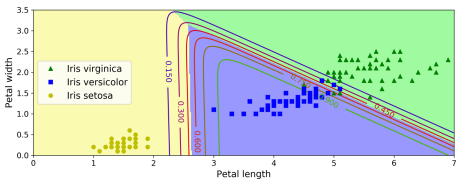

*Figura 4-25. Límites de decisión de regresión Softmax*

## Exercises
1. Which Linear Regression training algorithm can you use if you have a
training set with millions of features?
2. Suppose the features in your training set have very different scales.
Which algorithms might suffer from this, and how? What can you do
about it?
3. Can Gradient Descent get stuck in a local minimum when training a
Logistic Regression model?
4. Do all Gradient Descent algorithms lead to the same model, provided
you let them run long enough?
5. Suppose you use Batch Gradient Descent and you plot the validation
error at every epoch. If you notice that the validation error consistently
goes up, what is likely going on? How can you fix this?
6. Is it a good idea to stop Mini-batch Gradient Descent immediately when
the validation error goes up?
7. Which Gradient Descent algorithm (among those we discussed) will
reach the vicinity of the optimal solution the fastest? Which will
actually converge? How can you make the others converge as well?
8. Suppose you are using Polynomial Regression. You plot the learning
curves and you notice that there is a large gap between the training error
and the validation error. What is happening? What are three ways to
solve this?
9. Suppose you are using Ridge Regression and you notice that the
training error and the validation error are almost equal and fairly high.
Would you say that the model suffers from high bias or high variance?
Should you increase the regularization hyperparameter α or reduce it?
10. Why would you want to use:
a. Ridge Regression instead of plain Linear Regression (i.e.,
without any regularization)?
b. Lasso instead of Ridge Regression?
c. Elastic Net instead of Lasso?
11. Suppose you want to classify pictures as outdoor/indoor and
daytime/nighttime. Should you implement two Logistic Regression
classifiers or one Softmax Regression classifier?
12. Implement Batch Gradient Descent with early stopping for Softmax
Regression (without using Scikit-Learn).


## Exercise solutions

### 1. to 11.

1. If you have a training set with millions of features you can use Stochastic Gradient Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But you cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) with the number of features.
2. If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.
3. Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex. _Convex_ means that if you draw a straight line between any two points on the curve, the line never crosses the curve.
4. If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.
5. If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training.
6. Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is guaranteed to make progress at every single training iteration. So if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.
7. Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.
8. If the validation error is much higher than the training error, this is likely because your model is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model—for example, by adding an ℓ₂ penalty (Ridge) or an ℓ₁ penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of the training set.
9. If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias. You should try reducing the regularization hyperparameter _α_.
10. Let's see:
  * A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.
  * Lasso Regression uses an ℓ₁ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.
  * Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use Elastic Net with an `l1_ratio` close to 1.
11. If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.

### 12. Batch Gradient Descent with early stopping for Softmax Regression
Exercise: _Implement Batch Gradient Descent with early stopping for Softmax Regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset._

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [62]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

We need to add the bias term for every instance ($x_0 = 1$). The easiest option to do this would be to use Scikit-Learn's `add_dummy_feature()` function, but the point of this exercise is to get a better understanding of the algorithms by implementing them manually. So here is one possible implementation:

In [63]:
X_with_bias = np.c_[np.ones(len(X)), X]

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but again, we want to do it manually:

In [64]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for any given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. To understand this code, you need to know that `np.diag(np.ones(n))` creates an n×n matrix full of 0s except for 1s on the main diagonal. Moreover, if `a` is a NumPy array, then `a[[1, 3, 2]]` returns an array with 3 rows equal to `a[1]`, `a[3]` and `a[2]` (this is [advanced NumPy indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)).

In [65]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

Let's test this function on the first 10 instances:

In [66]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [67]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [68]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's scale the inputs. We compute the mean and standard deviation of each feature on the training set (except for the bias feature), then we center and scale each feature in the training set, the validation set, and the test set:

In [69]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [70]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [71]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [72]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.14519367480830644
2000 0.1301309575504088
3000 0.12009639326384539
4000 0.11372961364786884
5000 0.11002459532472425


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [73]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

Let's make predictions for the validation set and check the accuracy score:

In [74]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

Well, this model looks pretty ok. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [75]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # regularization hyperparameter

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [76]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

In this case, the $\ell_2$ penalty did not change the test accuracy. Perhaps try fine-tuning `alpha`?

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [77]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # regularization hyperparameter
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 early stopping!


In [78]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

Oh well, still no change in validation accuracy, but at least early stopping shortened training a bit.

Now let's plot the model's predictions on the whole dataset (remember to scale all features fed to the model):

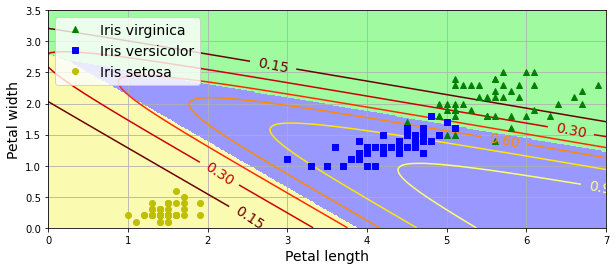

In [79]:
custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

And now let's measure the final model's accuracy on the test set:

In [80]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

Well we get even better performance on the test set. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.

## Notas

$\textbf{[1]}$ 

En machine learning, el Root Mean Square Error (RMSE) se traduce al español como Error Cuadrático Medio de la Raíz. Es una métrica que se utiliza comúnmente para evaluar la precisión de un modelo de regresión. Se calcula como la raíz cuadrada de la media de los errores al cuadrado entre los valores predichos por el modelo y los valores reales del conjunto de datos.

En términos matemáticos, el RMSE se define como:

$$ \text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2} $$

donde:
- $ m $ es el número de ejemplos en el conjunto de datos.
- $ y_i $ son los valores reales del objetivo para el i-ésimo ejemplo.
- $ \hat{y}_i $ son los valores predichos por el modelo para el i-ésimo ejemplo.



La ecuación del Mean Squared Error (MSE) para evaluar un modelo de regresión es simplemente:

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$


El MSE calcula el promedio de los cuadrados de los errores entre las predicciones del modelo ($ \hat{y}_i $) y los valores reales ($ y_i $). Es una medida de la calidad de las predicciones del modelo, donde valores más bajos indican un mejor ajuste del modelo a los datos observados.



La principal diferencia entre RMSE y Mean Squared Error (MSE) radica en la interpretación de la métrica resultante:
- **MSE**: Es simplemente la media de los errores al cuadrado entre los valores predichos y los valores reales, sin la raíz cuadrada. Por lo tanto, MSE es más sensible a valores atípicos (outliers) en los datos, ya que los errores más grandes contribuyen de manera proporcionalmente mayor a la métrica.
- **RMSE**: Al tomar la raíz cuadrada del MSE, el RMSE proporciona una medida de error que está en la misma unidad que la variable objetivo original. Esto hace que sea más interpretable, ya que representa el error promedio en la misma escala que los datos originales, además penaliza de manera más significativa los errores grandes en comparación con el MSE.